In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN




Counter({0.0: 4333, 1.0: 532, 2.0: 64})
测试数据: Counter({0.0: 1857, 1.0: 228, 2.0: 27})
resample后数据: Counter({2.0: 4333, 1.0: 4326, 0.0: 2316})
Accuracy: 77.98
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      1857
         1.0       0.29      0.69      0.41       228
         2.0       0.50      0.19      0.27        27

    accuracy                           0.78      2112
   macro avg       0.58      0.56      0.52      2112
weighted avg       0.88      0.78      0.81      2112



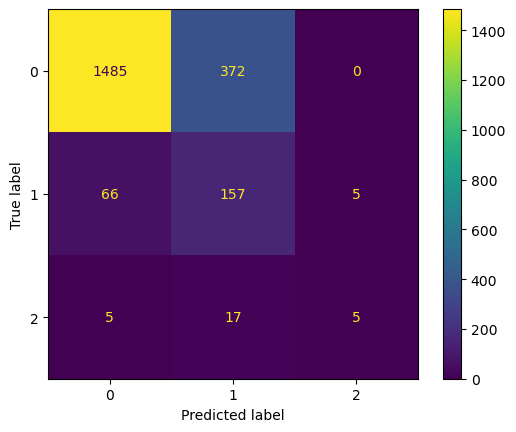

Recall:  0.7798295454545454
ROC AUC:  0.6976922561147142
F1:  0.8123858180111118


In [4]:
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员特征筛选后-心理健康数据集.csv')
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康特征筛选后-共同特征-数据集.csv')
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-共同特征-数据集.csv')
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-并集抑郁类别70.csv')
data_test = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-并集抑郁类别30.csv')

data = data.drop(['anxiety', 'suicide'], axis=1)
y = data['depression']
X = data.drop('depression', axis=1)
print(Counter(y))

data_test = data_test.drop(['anxiety', 'suicide'], axis=1)
y_test = data_test['depression']
X_test = data_test.drop('depression', axis=1)
print("测试数据:",Counter(y_test))

cc = SMOTEENN(random_state=20)
X_res, y_res = cc.fit_resample(X, y)
print("resample后数据:", Counter(y_res))
# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=150,random_state=20)
rfc.fit(X_res, y_res)
#save model
joblib.dump(rfc, '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/model/depression_model_after_smoteenn_union.joblib')

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)





Counter({0.0: 2655, 1.0: 1937, 2.0: 257, 3.0: 81})
测试数据: Counter({0.0: 1137, 1.0: 830, 2.0: 110, 3.0: 34})
resample后数据: Counter({3.0: 2655, 2.0: 2648, 1.0: 1091, 0.0: 1079})
Accuracy: 69.54
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79      1137
         1.0       0.63      0.67      0.65       830
         2.0       0.30      0.51      0.38       110
         3.0       0.41      0.38      0.39        34

    accuracy                           0.70      2111
   macro avg       0.54      0.58      0.55      2111
weighted avg       0.72      0.70      0.70      2111



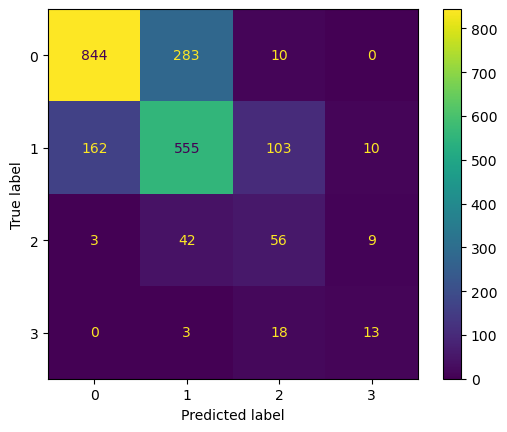

Recall:  0.6954050213169114
ROC AUC:  0.7252941630650235
F1:  0.704426760717333


In [5]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-并集焦虑类别70.csv')
data_test = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-并集焦虑类别30.csv')

data = data.drop(['depression', 'suicide'], axis=1)
y = data['anxiety']
X = data.drop('anxiety', axis=1)
print(Counter(y))

data_test = data_test.drop(['depression', 'suicide'], axis=1)
y_test = data_test['anxiety']
X_test = data_test.drop('anxiety', axis=1)
print("测试数据:",Counter(y_test))

cc = SMOTEENN(random_state=20)
X_res, y_res = cc.fit_resample(X, y)
print("resample后数据:", Counter(y_res))
rfc = RandomForestClassifier(n_estimators=200,random_state=20)
rfc.fit(X_res, y_res)
#save model
joblib.dump(rfc, '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/model/anxiety_model_after_smoteenn_union.joblib')

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)






Counter({1.0: 4592, 0.0: 337})
测试数据: Counter({1.0: 1968, 0.0: 144})
resample后数据: Counter({0.0: 4569, 1.0: 2844})
Counter({1.0: 1968, 0.0: 144})
Accuracy: 83.76
              precision    recall  f1-score   support

         0.0       0.21      0.52      0.30       144
         1.0       0.96      0.86      0.91      1968

    accuracy                           0.84      2112
   macro avg       0.59      0.69      0.61      2112
weighted avg       0.91      0.84      0.87      2112



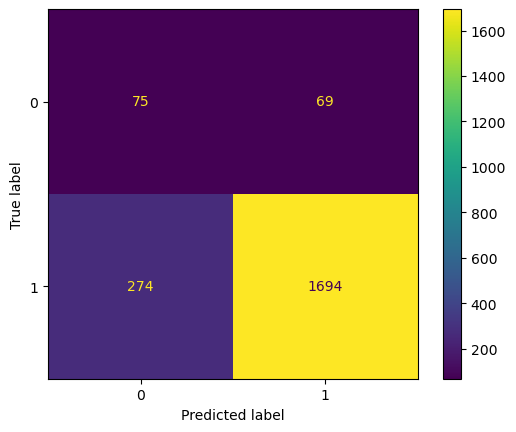

Recall:  0.837594696969697
ROC AUC:  0.6908028455284553
F1:  0.8668988212598762


In [98]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集自杀倾向70.csv')
data_test = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集自杀倾向30.csv')

data = data.drop(['depression', 'anxiety'], axis=1)
y = data['suicide']
X = data.drop('suicide', axis=1)
print(Counter(y))

data_test = data_test.drop(['depression', 'anxiety'], axis=1)
y_test = data_test['suicide']
X_test = data_test.drop('suicide', axis=1)
print("测试数据:",Counter(y_test))

cc = SMOTEENN(random_state=20,sampling_strategy="all")
# cc = SMOTE(random_state=42)

X_res, y_res = cc.fit_resample(X, y)
print("resample后数据:", Counter(y_res))
rfc = RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_res, y_res)

#save model
joblib.dump(rfc, '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/model/suicide_model_after_smoteenn_union.joblib')
print(Counter(y_test))
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b)

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)






resample后数据: Counter({2.0: 2672, 3.0: 2657, 0.0: 2644, 1.0: 2366})
Counter({0.0: 1148, 1.0: 828, 2.0: 103, 3.0: 34})
Accuracy: 73.17
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      1148
         1.0       0.67      0.67      0.67       828
         2.0       0.35      0.27      0.31       103
         3.0       0.46      0.38      0.42        34

    accuracy                           0.73      2113
   macro avg       0.57      0.54      0.55      2113
weighted avg       0.73      0.73      0.73      2113



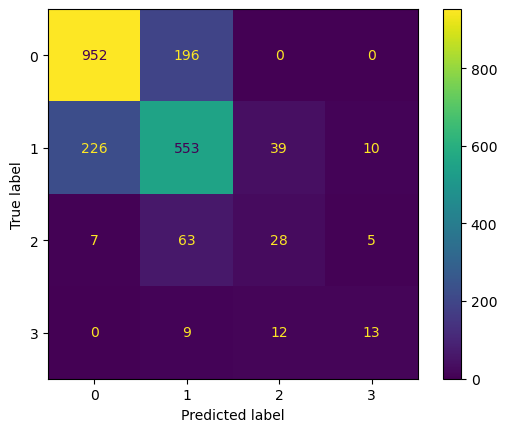

Recall:  0.7316611452910554
ROC AUC:  0.7085926325199191
F1:  0.7279695686947981


In [17]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-并集特征-数据集.csv')

# data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

y = data['anxiety']
X = data.drop('anxiety', axis=1)

# y = data['suicide']
# X = data.drop('suicide', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
cc = ADASYN(random_state=20,sampling_strategy="all")
# cc = SMOTE(random_state=42)

X_res, y_res = cc.fit_resample(x_train,y_train)
print("resample后数据:", Counter(y_res))
print(Counter(y_test))
brfc = RandomForestClassifier(random_state=20, n_estimators=100)
brfc.fit(X_res, y_res)
y_pred = brfc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class="ovr")

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)





resample后数据: Counter({1.0: 4374, 2.0: 4331, 0.0: 4322})
Counter({0.0: 1868, 1.0: 220, 2.0: 25})
Accuracy: 88.17
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1868
         1.0       0.43      0.30      0.36       220
         2.0       0.71      0.20      0.31        25

    accuracy                           0.88      2113
   macro avg       0.69      0.49      0.54      2113
weighted avg       0.87      0.88      0.87      2113



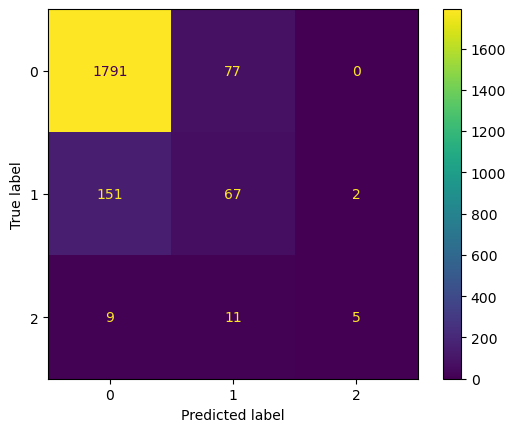

Recall:  0.8816848083293894
ROC AUC:  0.6271364602206311
F1:  0.8700905091078842


In [18]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-并集特征-数据集.csv')

data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

y = data['depression']
X = data.drop('depression', axis=1)

# y = data['anxiety']
# X = data.drop('anxiety', axis=1)

# y = data['suicide']
# X = data.drop('suicide', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
cc = ADASYN(random_state=20,sampling_strategy="all")
# cc = SMOTE(random_state=42)

X_res, y_res = cc.fit_resample(x_train,y_train)
print("resample后数据:", Counter(y_res))
print(Counter(y_test))
brfc = RandomForestClassifier(random_state=20, n_estimators=100)
brfc.fit(X_res, y_res)
y_pred = brfc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class="ovr")

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)





Counter({1.0: 4599, 0.0: 329})
              precision    recall  f1-score   support

         0.0       0.23      0.47      0.30       152
         1.0       0.95      0.88      0.91      1961

    accuracy                           0.85      2113
   macro avg       0.59      0.67      0.61      2113
weighted avg       0.90      0.85      0.87      2113

Accuracy: 84.67


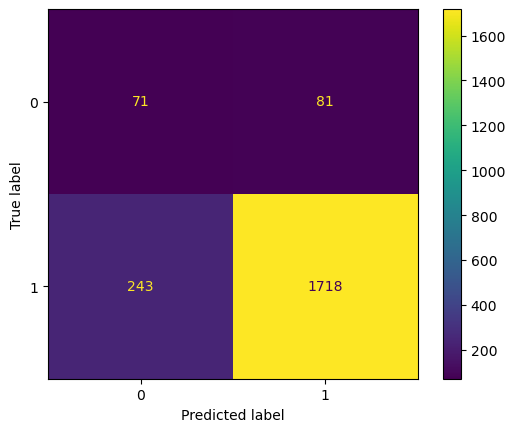

Precision: 90.25%
Recall: 84.67%
ROC AUC:  0.6715944469792533


In [97]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集特征-数据集.csv')

# data = data.drop(['anxiety', 'suicide'], axis=1)
data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

# y = data['anxiety']
# X = data.drop('anxiety', axis=1)

y = data['suicide']
X = data.drop('suicide', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
clf2 = LogisticRegression(class_weight='balanced', random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# define ensemble classifier
estimators = [('dt', clf1), ('lr', clf2), ('rf', clf3)]
ensemble = VotingClassifier(estimators=estimators, voting='soft')

# fit ensemble classifier on the imbalanced dataset
ensemble.fit(x_train, y_train)
print(Counter(y_train))
# evaluate the ensemble classifier on the imbalanced dataset
y_pred = ensemble.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
cm = confusion_matrix(y_test, y_pred)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b)

# evaluate the performance of the model
score = ensemble.score(x_test, y_test)
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print('ROC AUC: ', roc_auc)



